# EDA -Exploratory Data Analysis on Airbnb Data

In [3]:
import folium
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df1 = pd.read_csv('AirBNB.csv')

1. Airbnb property prices across the continents

In [3]:
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
response = requests.get(geojson_url)
geojson = response.json()

m1 = folium.Map(location=[30,10],zoom_start=1,tiles="cartodb positron")
folium.Choropleth(
    geo_data= geojson,
    data = df1,
    columns= ['code','Price'],
    key_on= 'feature.id',
    fill_color='YlOrRd',
    nan_fill_color= 'white',
    fill_opacity= 0.7,
    line_opacity= 0.2,
    legend_name= "Property prices across the countries").add_to(m1)

folium.LayerControl().add_to(m1)
m1

2. Suburbs with highest number of listing

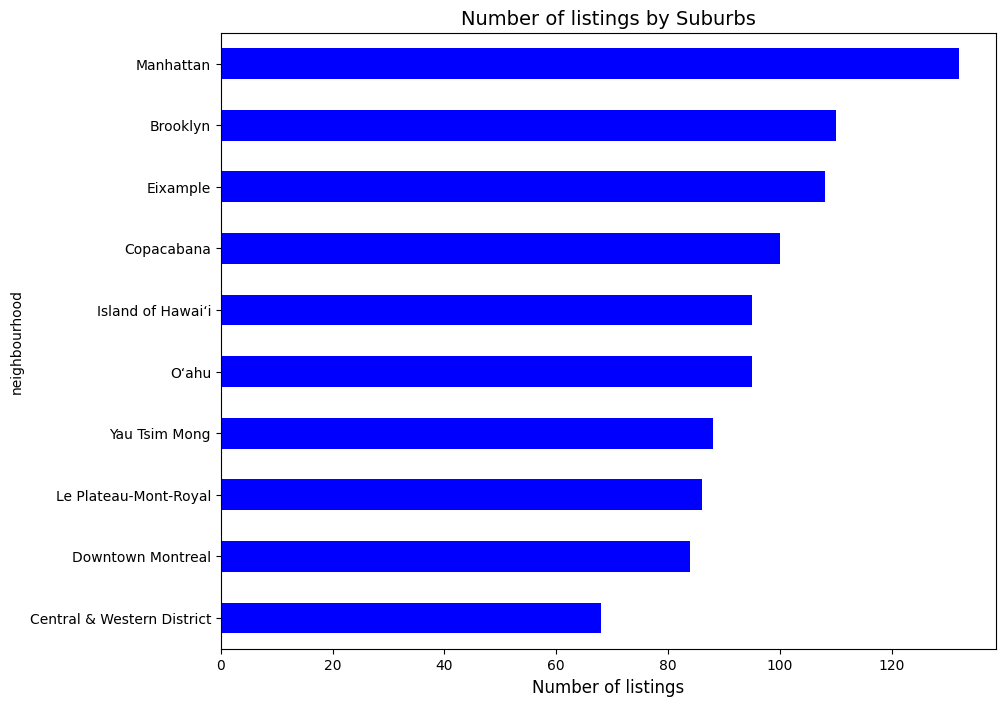

In [4]:
sub = df1['neighbourhood'].value_counts().sort_values(ascending=True)
sub = sub[-10:]
sub.plot.barh(figsize=(10,8), color ='r', width= 0.5)
plt.title('Number of listings by Suburbs', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

3. Listings by Room type

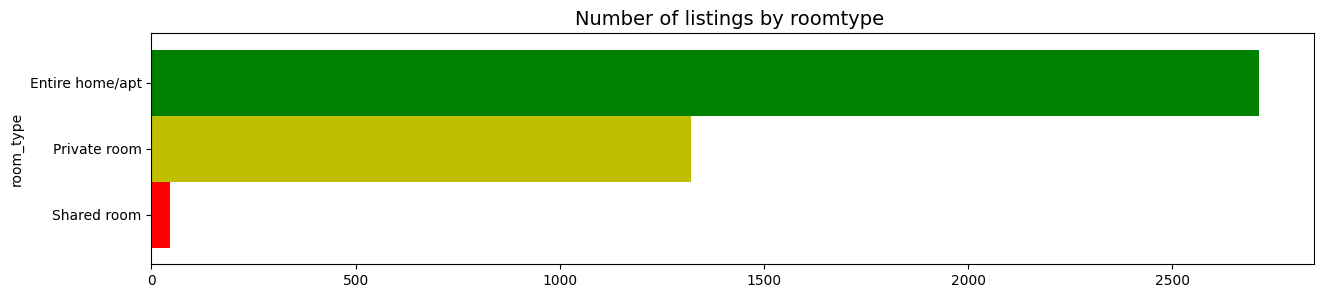

In [6]:
rmty = df1['room_type'].value_counts().sort_values(ascending=True)
rmty.plot.barh(figsize =(15,3), width=1, color=['r','y','g'])
plt.title("Number of listings by roomtype ", fontsize=14)
plt.show()

Obervation:
Here,the entire home/apt’s size is aproximately double that of private rooms. Yet the Room rentals per day are costlier as compared to month’s rent. Therefore renting out Private rooms for a couple of days could help owners earn more. 

4. Number of listings by Property Type

Index(['count'], dtype='object')


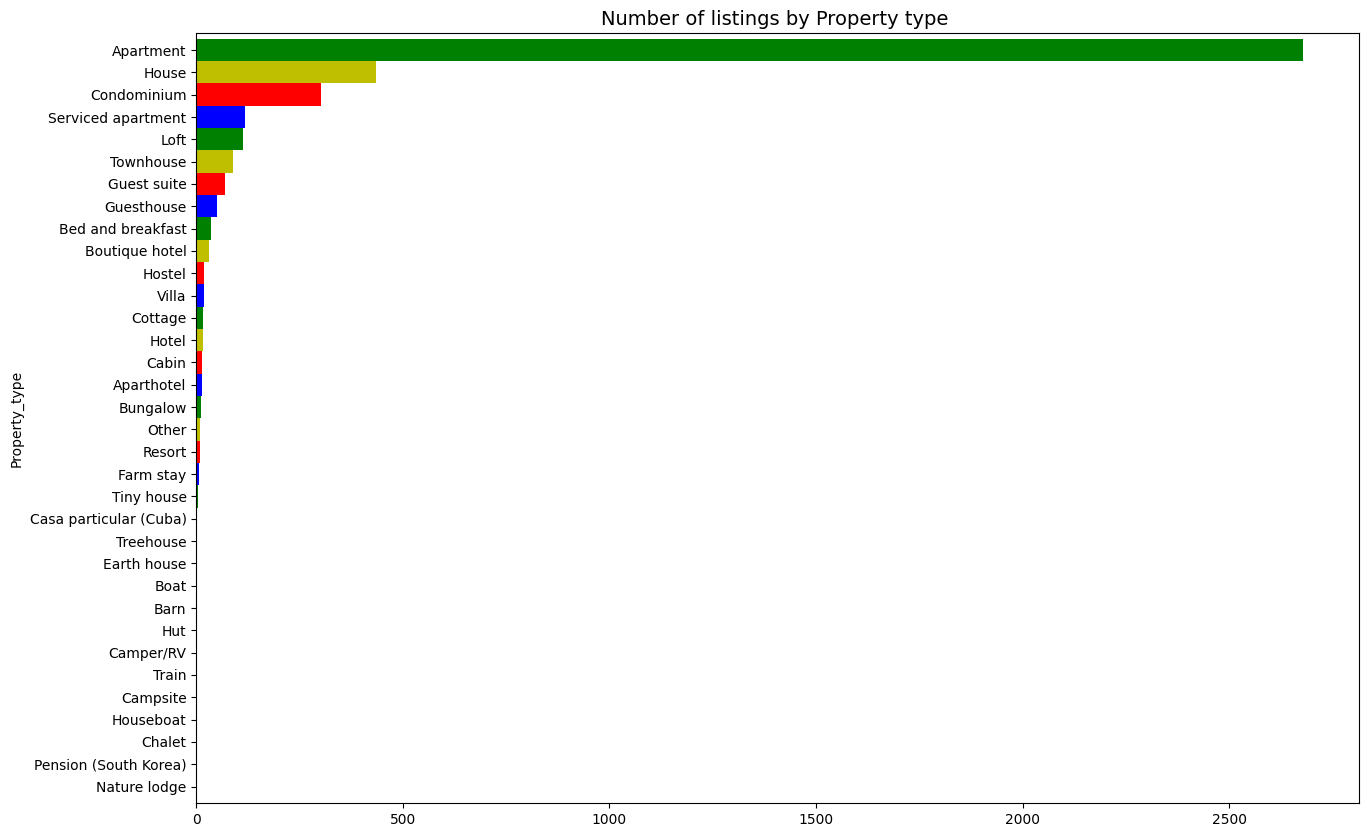

In [9]:
prop = df1['Property_type'].value_counts().sort_values(ascending=True)
df = pd.DataFrame(prop,columns = ['count'])
prop.plot.barh(figsize =(15,10), width=1, color=['y','g','b','r'])                                          
plt.title("Number of listings by Property type ", fontsize=14)
plt.show()

5.Number of guests

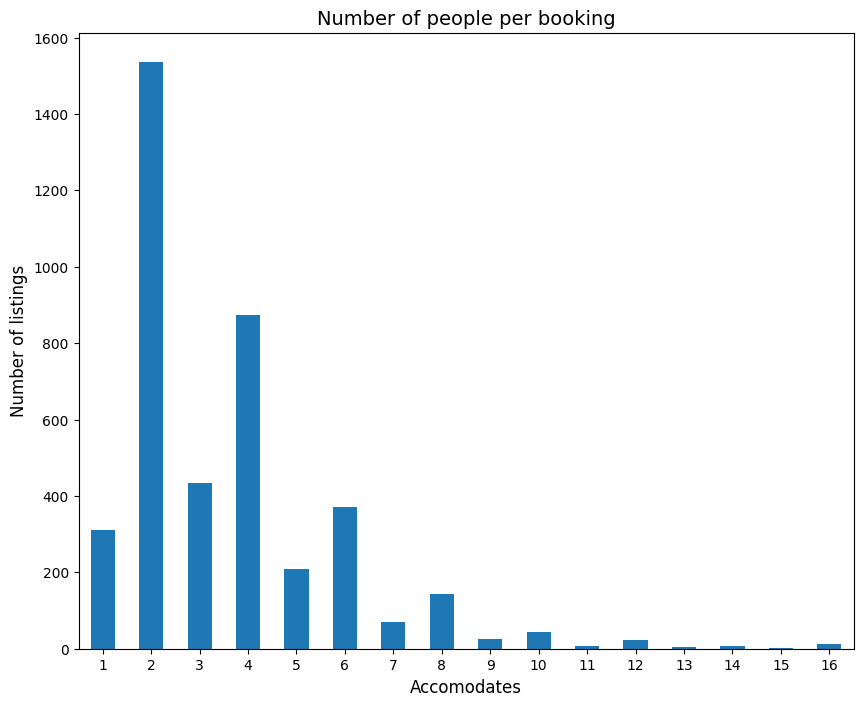

In [11]:
acc = df1['Accomadates'].value_counts().sort_index()
acc.plot.bar(figsize=(10,8), width=0.5, rot=0)
plt.title('Number of people per booking', fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accomodates', fontsize=12)
plt.show()

From the plot we can observe, about 70% of bookings are 2 to 4 guests per property. Probably it’s a single room apartment or a hotel, which means people mostly prefer single room apartments/Private rooms/Shared rooms. Thus instead of renting out an entire apt/home, renting rooms can attarct more customers. 

6. Average cost for different rooms and property types.

In [12]:
room = df1.groupby(['Property_type','room_type'])['Price'].mean().reset_index()
room = df1.sort_values('Price',ascending=[0])
room[['Property_type','room_type','Price']].head()

,Property_type,room_type,Price
2703,Serviced apartment,Private room,11681.0
1798,Condominium,Entire home/apt,10001.0
2277,Hotel,Private room,7203.0
3561,House,Entire home/apt,7002.0
2072,House,Entire home/apt,3730.0


7. Top 5 Hosts

In [16]:
host_stat = df1.groupby(['host_name']).agg({
    'host_id': 'count',
    'Price': 'mean',
    'min_nights': 'mean',
    'review_score': 'mean'
})
host_stat = host_stat.rename(columns={'host_id': 'listings_count', 'Price': 'mean_price', 'min_nights': 'mean_minimum nights'})
host_stat.sort_values(by='listings_count',ascending=False).head(5)

,listings_count,mean_price,mean_minimum nights,review_score
host_name,,,,
Maria,29,198.689655,3.137931,95.379310
David,20,155.350000,5.500000,93.450000
Sarah,18,569.388889,1.777778,90.833333
Mike,17,245.352941,5.823529,94.588235
Mark,16,235.500000,2.875000,89.437500
